# Final project: Second-hand car purchases

**Scenario:** We work as a Data Scientist for a US used car dealer. The dealer buys used cars cheaply in online auctions and from other car sellers, then resells them for profit. It is not always easy to tell whether buying an used car is worth it: one of the biggest challenges in used car auctions is the risk of a car having such serious problems that prevent it from being resold to customers. These are cars that have significant defects from the outset due to production faults that significantly affect the safety, use or value of that car, and at the same time cannot be fixed in a reasonable number of repairs or within a certain period of time. In this case, the customer has the right to be refunded the purchase price. Thus, in addition to the purchase costs, the incorrect purchase of such cars leads to significant subsequent costs, such as the storage and repair of the car, which may result in losses when the car is resold.

It is therefore important as many bad purchases of those faulty cars (so called "Friday cars") as possible. In order to relieve the buyers in the company with the huge number of offers, we are to develop a model that predicts whether the car is "Bad Buy" or not. However, this must not lead to the exclusion of too many good buys.

The goal is to create and train a model based on the data in the *data_train.csv* file. Then i have to create a classifications for data points, whose target values only the SF examiners know. Those data points are located in the file *features_aim.csv*. 

Needless to say, that during this project we were working on SF servers - we had very limited computing capacity. Also, the runtime of each code cell was limited to 15 minutes. This means, that we had to pick the best features (to work with as small dataset as possible) and there wasnt much room for creating fancy big models.

Each row of the dataset corresponds to a car that was first bought at auction and then resold. The data looks like this:

Column number | Column name | Data type | Description
:---|:---|:---|:----  
1  |  `'IsBadBuy'` | categorical (nominal) | Identifies if the auctioned vehicle was a "Friday car" and therefore a bad buy (`0`= no Friday car, `1`= Friday car (not profitable))
2  |  `'PurchDate'` | continuous (`datetime`) | The date on which the vehicle was purchased at auction
3  |  `'Auction'` | categorical (nominal) | Auction seller from whom the vehicle was purchased
4  |  `'VehYear'` | continuous (`int`) | Year of manufacture of the vehicle
5  |  `'VehicleAge'` | continuous (`int`) | Age of the car at the time of the auction
6  |  `'Make'` | categorical (nominal) | Vehicle manufacturer
7  |  `'Model'` | categorical (nominal) | Model
8  |  `'Trim'` | categorical (nominal) | Car equipment
9  |  `'SubModel'` | categorical (nominal) | Submodel
10  |  `'Color'` | categorical (nominal) | Color
11  |  `'Transmission'` | categorical (nominal) | Transmission type
12  |  `'WheelTypeID'` | categorical (nominal) | Rims type (ID)
13  |  `'WheelType'` | categorical (nominal) | Rims type
14  |  `'VehOdo'` | continuous (`int`) | Mileage of the vehicle
15  |  `'Nationality'` | categorical (nominal) | The country of the manufacturer
16  |  `'Size'` | categorical (nominal) | The size class of the vehicle (sport, SUV, etc.)
17  |  `'TopThreeAmericanName'` | categorical (nominal) | Identifies if the manufacturer is one of the top three U.S. manufacturers.
18  |  `'MMRAcquisitionAuctionAveragePrice'` | continuous (`int`) | Purchase price in U.S. dollars for this vehicle in average condition at the time of purchase
19  |  `'MMRAcquisitionAuctionCleanPrice'` | continuous (`int`) | Purchase price in U.S. dollars for this vehicle in above-average condition at the time of purchase
20  |  `'MMRAcquisitionRetailAveragePrice'` | continuous (`int`) | Purchase price in U.S. dollars for this vehicle at retail in average condition at the time of purchase
21  |  `'MMRAcquisitonRetailCleanPrice'` | continuous (`int`) | Purchase price in U.S. dollars for this vehicle at retail in above-average condition at the time of purchase
22  |  `'MMRCurrentAuctionAveragePrice'` | continuous (`int`) | Acquisition price in U.S. dollars for this vehicle in average condition as of the current date
23  |  `'MMRCurrentAuctionCleanPrice'` | continuous (`int`) | Purchase price in U.S. dollars for this vehicle in above-average condition as of the current date
24  |  `'MMRCurrentRetailAveragePrice'` | continuous (`int`) | Purchase price in U.S. dollars for this vehicle at retail in average condition as of the current date
25  |  `'MMRCurrentRetailCleanPrice'` | continuous (`int`) | Purchase price in U.S. dollars for this vehicle at retail in above-average condition as of the current date
26  |  `'PRIMEUNIT'` | categorical (nominal) | Identifies if the vehicle would have a higher demand than a standard purchase
27  |  `'AUCGUART'` | categorical (nominal) | The warranty level of the vehicle (`'GREEN'` - warranty available, `'YELLOW'` - warranty unclear, `'RED'` - no warranty)
28  |  `'BYRNO'` | categorical (nominal) | Unique number assigned to the buyer who purchased the vehicle
29  |  `'VNZIP1'` | categorical (nominal) | Zip code where the car was purchased
30  |  `'VNST'` | categorical (nominal) |  State in which the car was purchased
31  |  `'VehBCost'` | continuous (`int`) | Acquisition cost in US dollars paid for the vehicle at the time of purchase
32  |  `'IsOnlineSale'` | categorical (nominal) |  Identifies whether the vehicle was originally purchased online
33  |  `'WarrantyCost'` | continuous (`int`) | Cost of the warranty for a period of 36 months

In [15]:
# import modules 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from datetime import datetime
from IPython.display import display
from IPython.display import Image  
from pdpbox import pdp
from math import radians, sin, cos, sqrt, atan2
from pydotplus import graph_from_dot_data

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

pd.set_option("display.float_format", "{:.2f}".format)

In [24]:
# read data
df = pd.read_csv("data_train.csv")

## EDA - Exploratory data analysis

The goal here is to simply understand the data, check for duplicates and NaNs, check correlations. 

In [25]:
# df has no duplicated rows
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0

In [26]:
display(df.info(), 
        df.isna().sum(),
        df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65620 entries, 0 to 65619
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           65620 non-null  int64  
 1   PurchDate                          65620 non-null  int64  
 2   Auction                            65620 non-null  object 
 3   VehYear                            65620 non-null  int64  
 4   VehicleAge                         65620 non-null  int64  
 5   Make                               65620 non-null  object 
 6   Model                              65620 non-null  object 
 7   Trim                               63522 non-null  object 
 8   SubModel                           65613 non-null  object 
 9   Color                              65613 non-null  object 
 10  Transmission                       65612 non-null  object 
 11  WheelTypeID                        62747 non-null  flo

None

IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2098
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2873
WheelType                             2877
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          290
MMRCurrentAuctionCleanPrice            290
MMRCurrentR

,IsBadBuy,PurchDate,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,65620.00,65620.00,65620.00,65620.00,62747.00,65620.00,65602.00,65602.00,65602.00,65602.00,65330.00,65330.00,65330.00,65330.00,65620.00,65620.00,65564.00,65620.00,65620.00
mean,0.12,1263117405.57,2005.35,4.18,1.49,71505.93,6127.14,7371.16,8498.24,9851.61,6131.69,7389.95,8776.87,10145.91,26363.52,58090.45,6727.46,0.03,1277.38
std,0.33,18202492.82,1.73,1.71,0.52,14582.98,2456.97,2716.44,3153.98,3382.36,2430.51,2681.44,3087.01,3305.66,25733.11,26147.50,1759.01,0.16,599.97
min,0.00,1231113600.00,2001.00,0.00,0.00,5368.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,835.00,3106.00,1.00,0.00,462.00
25%,0.00,1248048000.00,2004.00,3.00,1.00,61844.75,4273.00,5405.00,6279.00,7494.00,4275.00,5412.00,6540.00,7790.25,17212.00,32124.00,5435.00,0.00,837.00
50%,0.00,1264032000.00,2005.00,4.00,1.00,73378.50,6094.00,7303.00,8447.00,9792.00,6062.00,7314.00,8736.00,10103.00,19662.00,73129.00,6700.00,0.00,1169.00
75%,0.00,1279065600.00,2007.00,5.00,2.00,82440.00,7765.00,9018.75,10658.00,12094.00,7735.00,9012.00,10910.00,12309.00,22808.00,80022.00,7900.00,0.00,1623.00
max,1.00,1293667200.00,2010.00,9.00,3.00,115717.00,35722.00,36859.00,39080.00,41482.00,35722.00,36859.00,39080.00,41062.00,99761.00,99224.00,38785.00,1.00,7498.00


In [27]:
df.groupby("IsBadBuy").median()

,PurchDate,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
IsBadBuy,,,,,,,,,,,,,,,,,,
0,1263945600.00,2006.00,4.00,1.00,72892.00,6240.00,7450.00,8573.00,9926.00,6206.00,7450.00,8898.50,10268.00,19662.00,73108.00,6800.00,0.00,1155.00
1,1265155200.00,2005.00,5.00,1.00,76507.50,4989.00,6192.00,7451.00,8831.00,5008.00,6205.50,7618.50,8987.00,19638.00,74135.00,5985.00,0.00,1243.00


In [31]:
display(pd.crosstab(df["IsBadBuy"], df["Auction"], normalize = "columns"), 
        pd.crosstab(df["IsBadBuy"], df["Color"], normalize = "columns"), 
        pd.crosstab(df["IsBadBuy"], df["Transmission"], normalize = "columns"), 
        pd.crosstab(df["IsBadBuy"], df["WheelType"], normalize = "columns"), 
        pd.crosstab(df["IsBadBuy"], df["Nationality"], normalize = "columns"), 
        pd.crosstab(df["IsBadBuy"], df["TopThreeAmericanName"], normalize = "columns"), 
        pd.crosstab(df["IsBadBuy"], df["Size"], normalize = "columns"), 
        pd.crosstab(df["IsBadBuy"], df["PRIMEUNIT"], normalize = "columns"),
        pd.crosstab(df["IsBadBuy"], df["AUCGUART"], normalize = "columns"), 
        pd.crosstab(df["IsBadBuy"], df["VNST"], normalize = "columns"), 
        pd.crosstab(df["IsBadBuy"], df["IsOnlineSale"], normalize = "columns"))

Auction,ADESA,MANHEIM,OTHER
IsBadBuy,,,
0,0.85,0.88,0.88
1,0.15,0.12,0.12


Color,BEIGE,BLACK,BLUE,BROWN,GOLD,GREEN,GREY,MAROON,NOT AVAIL,ORANGE,OTHER,PURPLE,RED,SILVER,WHITE,YELLOW
IsBadBuy,,,,,,,,,,,,,,,,
0,0.86,0.89,0.89,0.86,0.86,0.87,0.89,0.87,0.74,0.92,0.87,0.84,0.87,0.88,0.87,0.86
1,0.14,0.11,0.11,0.14,0.14,0.13,0.11,0.13,0.26,0.08,0.13,0.16,0.13,0.12,0.13,0.14


Transmission,AUTO,MANUAL,Manual
IsBadBuy,,,
0,0.88,0.88,1.00
1,0.12,0.12,0.00


WheelType,Alloy,Covers,Special
IsBadBuy,,,
0,0.89,0.92,0.87
1,0.11,0.08,0.13


Nationality,AMERICAN,OTHER,OTHER ASIAN,TOP LINE ASIAN
IsBadBuy,,,,
0,0.88,0.86,0.87,0.87
1,0.12,0.14,0.13,0.13


TopThreeAmericanName,CHRYSLER,FORD,GM,OTHER
IsBadBuy,,,,
0,0.88,0.84,0.89,0.87
1,0.12,0.16,0.11,0.13


Size,COMPACT,CROSSOVER,LARGE,LARGE SUV,LARGE TRUCK,MEDIUM,MEDIUM SUV,SMALL SUV,SMALL TRUCK,SPECIALTY,SPORTS,VAN
IsBadBuy,,,,,,,,,,,,
0,0.84,0.89,0.91,0.84,0.89,0.88,0.85,0.86,0.85,0.91,0.82,0.87
1,0.16,0.11,0.09,0.16,0.11,0.12,0.15,0.14,0.15,0.09,0.18,0.13


PRIMEUNIT,NO,YES
IsBadBuy,,
0,0.96,0.91
1,0.04,0.09


AUCGUART,GREEN,RED
IsBadBuy,,
0,0.96,0.90
1,0.04,0.10


VNST,AL,AR,AZ,CA,CO,FL,GA,IA,ID,IL,...,OK,OR,PA,SC,TN,TX,UT,VA,WA,WV
IsBadBuy,,,,,,,,,,,,,,,,,,,,,
0,0.87,0.78,0.89,0.87,0.88,0.89,0.89,0.85,0.90,0.86,...,0.91,0.94,0.83,0.86,0.88,0.86,0.88,0.84,0.94,0.91
1,0.13,0.22,0.11,0.13,0.12,0.11,0.11,0.15,0.10,0.14,...,0.09,0.06,0.17,0.14,0.12,0.14,0.12,0.16,0.06,0.09


IsOnlineSale,0,1
IsBadBuy,,
0,0.88,0.88
1,0.12,0.12


In [34]:
# cars from some manufacturers are "BadBuy" more often than others (acura, infiniti, mini...)
# 1029 different models - too many categories
# 134 trims and 840 submodels - also too many categories

# in the assignment it is said, that "Model", "Trim" and "Submodel" make very little no none difference, 
# and considering our limited computing capacity it is for the best to neglect those features

#commented out to save space
# display(pd.crosstab(df["Make"], df["IsBadBuy"], normalize = "index"), 
#         pd.crosstab(df["Model"], df["IsBadBuy"], normalize = "index"), 
#         pd.crosstab(df["Trim"], df["IsBadBuy"], normalize = "index"), 
#         pd.crosstab(df["SubModel"], df["IsBadBuy"], normalize = "index"))

In [35]:
# target categories not balanced
pd.crosstab(df["IsBadBuy"], "count")

col_0,count
IsBadBuy,
0,57516
1,8104


<AxesSubplot:>

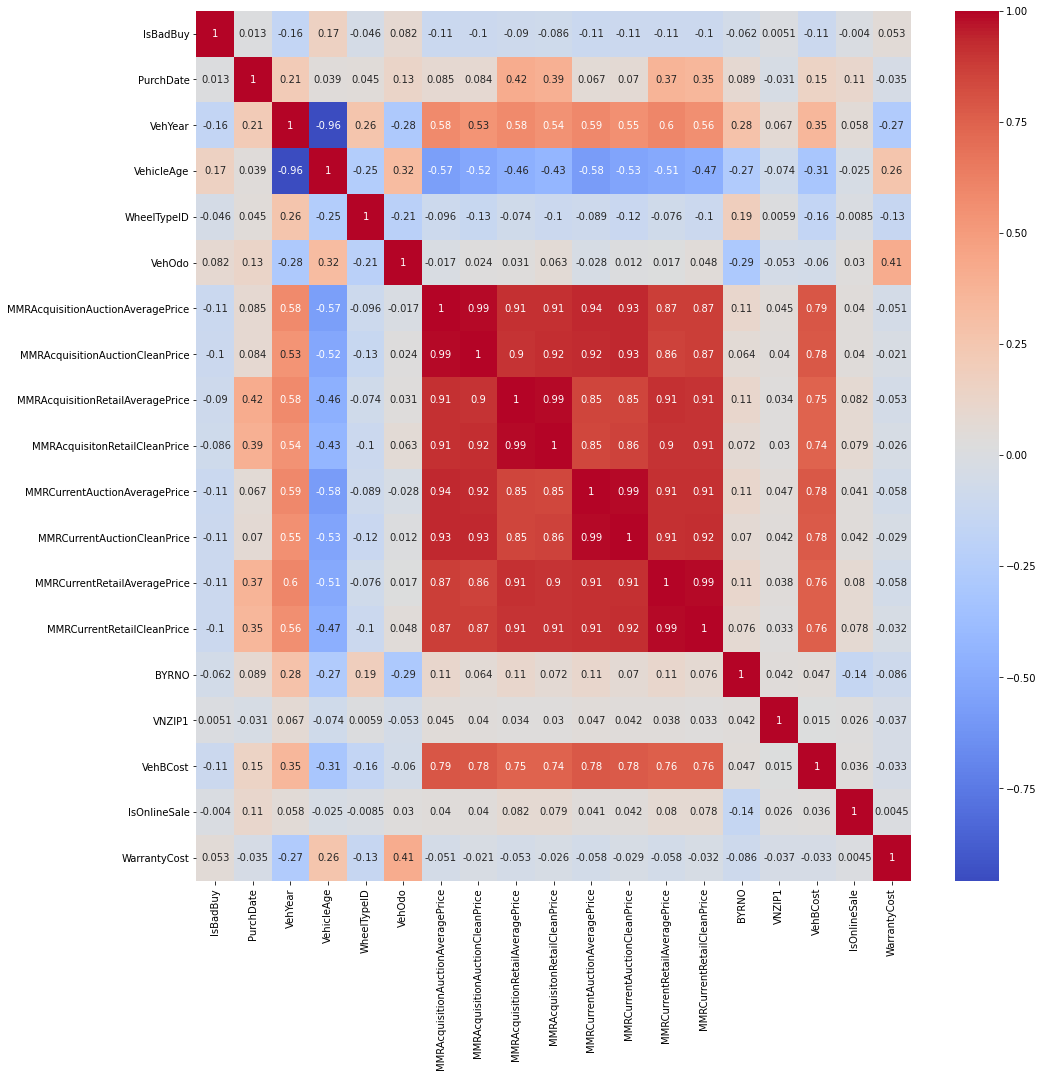

In [9]:
fig, ax = plt.subplots(figsize = (16, 16))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm', ax = ax)

# Very strong correlation between all the MMR columns.
# In case of missing values in one column i can replace them with values from other column, because of the correlation...

In [36]:
pd.crosstab(df["IsBadBuy"], df["VNST"], normalize = "columns")

VNST,AL,AR,AZ,CA,CO,FL,GA,IA,ID,IL,...,OK,OR,PA,SC,TN,TX,UT,VA,WA,WV
IsBadBuy,,,,,,,,,,,,,,,,,,,,,
0,0.87,0.78,0.89,0.87,0.88,0.89,0.89,0.85,0.90,0.86,...,0.91,0.94,0.83,0.86,0.88,0.86,0.88,0.84,0.94,0.91
1,0.13,0.22,0.11,0.13,0.12,0.11,0.11,0.15,0.10,0.14,...,0.09,0.06,0.17,0.14,0.12,0.14,0.12,0.16,0.06,0.09


<AxesSubplot:xlabel='VNST'>

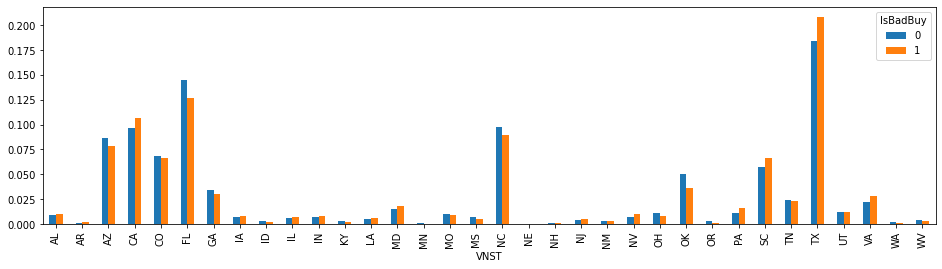

In [11]:
fig, ax = plt.subplots(figsize = (16, 4))
grouped = pd.crosstab(df["VNST"], df["IsBadBuy"], normalize = "columns")
grouped.plot(kind='bar', stacked=False, ax = ax)

<AxesSubplot:xlabel='Nationality'>

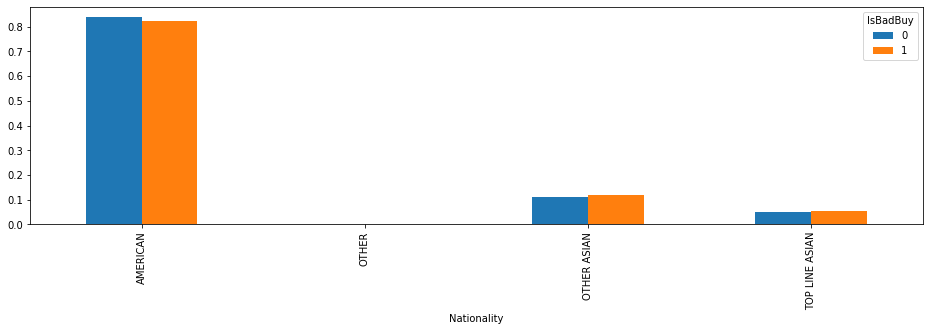

In [39]:
fig, ax = plt.subplots(figsize = (16, 4))
grouped = pd.crosstab(df["Nationality"], df["IsBadBuy"], normalize = "columns")
grouped.plot(kind='bar', stacked=False, ax = ax)

<AxesSubplot:xlabel='TopThreeAmericanName'>

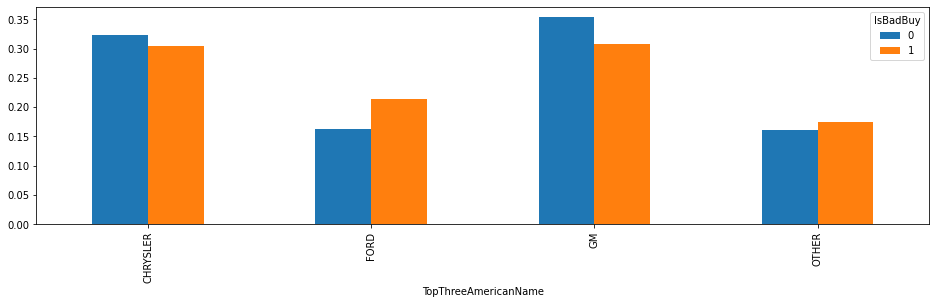

In [40]:
fig, ax = plt.subplots(figsize = (16, 4))
grouped = pd.crosstab(df["TopThreeAmericanName"], df["IsBadBuy"], normalize = "columns")
grouped.plot(kind='bar', stacked=False, ax = ax)

# TopThreeAmericanName feature seems to be better than Nationality for the following reasons:
# 1) the categories in Nationality are hugely disproportionate - American contains many times more datapoints than the other three categories together,
# 2) there is not huge difference between "IsBadBuy" 1/0 between categories
# 3) TopThreeAmericanName has balanced categories, and "IsBadBuy" differences are visible

In [50]:
display(pd.crosstab(df["IsBadBuy"], df["TopThreeAmericanName"],normalize = "columns"), pd.crosstab(df["IsBadBuy"], df["Nationality"],normalize = "columns"))
# i will use TTAN, because the distribution is more even, and there is bigger difference in "IsBadBuy" distribution

TopThreeAmericanName,CHRYSLER,FORD,GM,OTHER
IsBadBuy,,,,
0,0.88,0.84,0.89,0.87
1,0.12,0.16,0.11,0.13


Nationality,AMERICAN,OTHER,OTHER ASIAN,TOP LINE ASIAN
IsBadBuy,,,,
0,0.88,0.86,0.87,0.87
1,0.12,0.14,0.13,0.13


<AxesSubplot:xlabel='Size'>

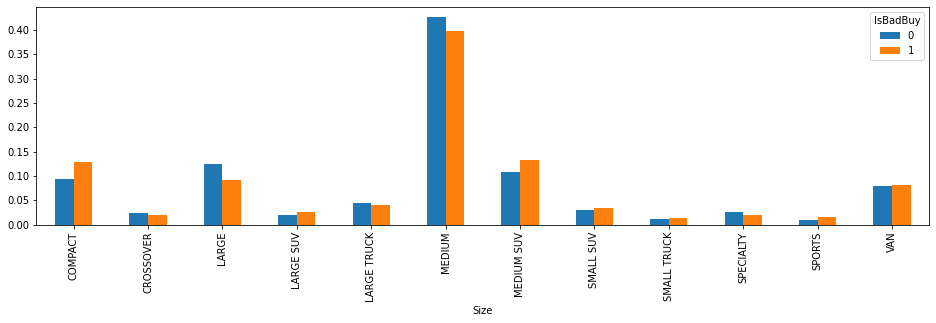

In [41]:
fig, ax = plt.subplots(figsize = (16, 4))
grouped = pd.crosstab(df["Size"], df["IsBadBuy"], normalize = "columns")
grouped.plot(kind='bar', stacked=False, ax = ax)

<AxesSubplot:xlabel='Make'>

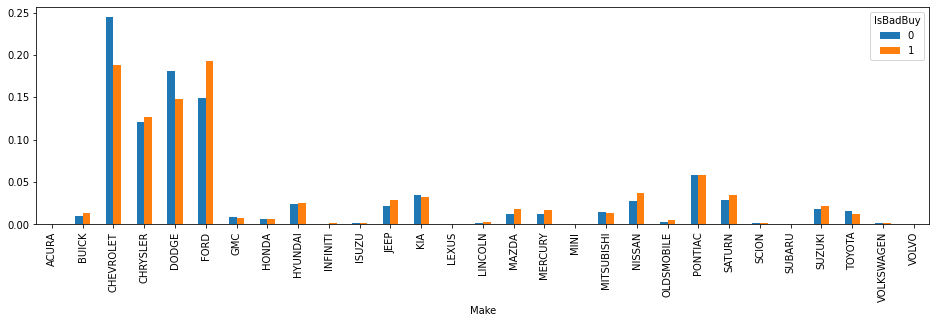

In [42]:
fig, ax = plt.subplots(figsize = (16, 4))
grouped = pd.crosstab(df["Make"], df["IsBadBuy"], normalize = "columns")
grouped.plot(kind='bar', stacked=False, ax = ax)

# Ford seems to be the most faulty car (at least between the most represented car brands in the dataset)

<AxesSubplot:>

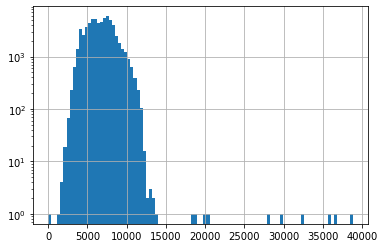

In [44]:
df["VehBCost"].hist(bins = 100, log = True)

<AxesSubplot:>

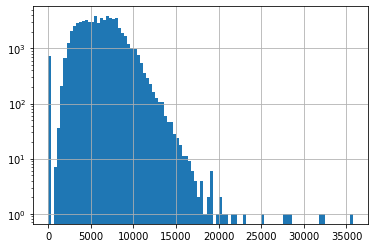

In [45]:
df["MMRAcquisitionAuctionAveragePrice"].hist(bins = 100, log = True)

In [19]:
supercheap = ((df["MMRAcquisitionAuctionAveragePrice"] < 10) | 
              (df["MMRAcquisitionAuctionCleanPrice"] < 10) |
              (df["MMRAcquisitionRetailAveragePrice"] < 10) |
              (df["MMRAcquisitonRetailCleanPrice"] < 10) |
              (df["MMRCurrentAuctionAveragePrice"] < 10) |
              (df["MMRCurrentAuctionCleanPrice"] < 10) |
              (df["MMRCurrentRetailAveragePrice"] < 10) |
              (df["MMRCurrentRetailCleanPrice"] < 10))


df.loc[supercheap, ["MMRAcquisitionAuctionAveragePrice", "MMRAcquisitionAuctionCleanPrice", "MMRAcquisitionRetailAveragePrice", "MMRAcquisitonRetailCleanPrice", "MMRCurrentAuctionAveragePrice", "MMRCurrentAuctionCleanPrice", "MMRCurrentRetailAveragePrice", "MMRCurrentRetailCleanPrice"]]

# value 1 is only in auction clean price (acquisition and current) - people want to get rid of car
# value 0 - the prices are missing
# imputing strategy - if only Current or Acquisition is missing, then fill with the other one
#                   - if both are missing - calculate by some coefficients from VehBCost
#                   - not a single car, where all the MMR values and VehBCost would be missing

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
54,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
157,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
201,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...
65281,0.00,0.00,0.00,0.00,4395.00,5485.00,8013.00,9274.00
65363,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
65385,5153.00,6698.00,6065.00,7734.00,0.00,1.00,0.00,0.00
65496,0.00,0.00,0.00,0.00,7354.00,8897.00,11414.00,12808.00


<AxesSubplot:ylabel='Density'>

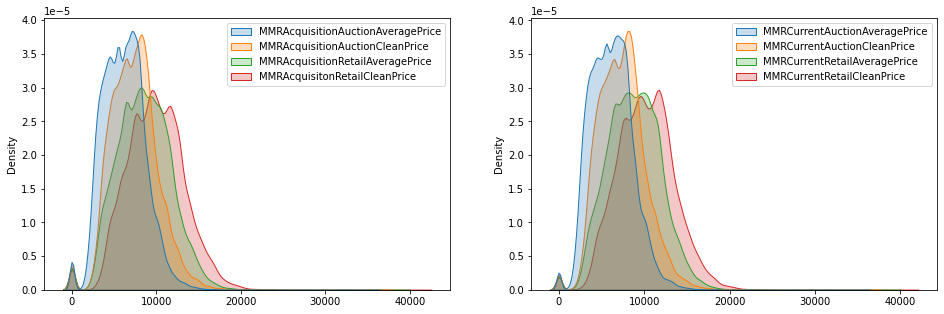

In [20]:
fig, ax = plt.subplots(ncols = 2, figsize = (16, 5))
sns.kdeplot(data=df[['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice']], shade=True, ax = ax[0])

sns.kdeplot(data=df[['MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']], shade=True, ax = ax[1])

# the distribution of MMR Acquisition and Current is very similar, values can be used to impute each other

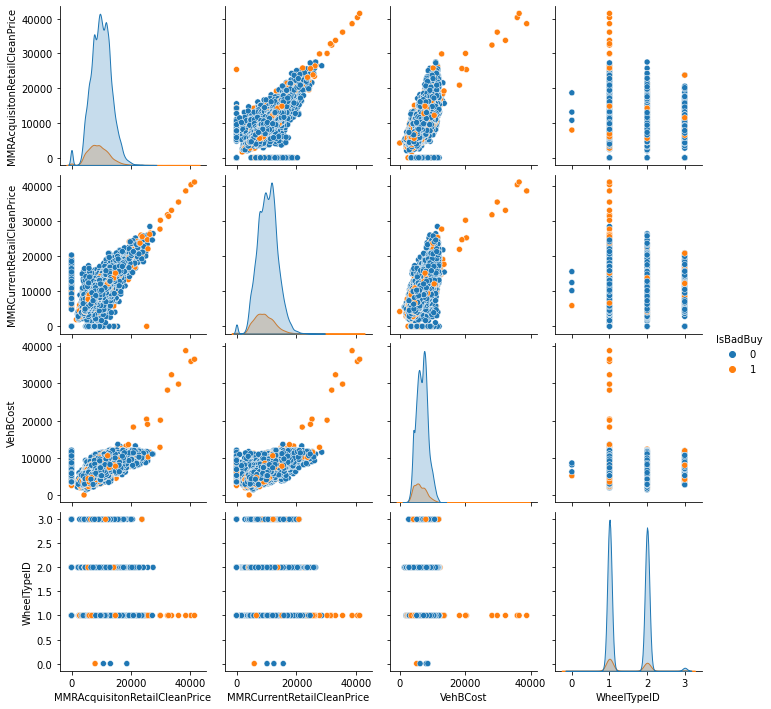

In [58]:
df = pd.read_csv("data_train.csv")
sns.pairplot(df.loc[:, ["MMRAcquisitonRetailCleanPrice", "MMRCurrentRetailCleanPrice", "VehBCost", "WheelTypeID", "IsBadBuy"]], hue = "IsBadBuy")

In [22]:
imputcoefsdf = df.loc[:, ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'VehBCost']]
mmrcols = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']

for c in mmrcols:
    name = c + "vsPRICE"
    imputcoefsdf[name] = imputcoefsdf[c] / imputcoefsdf["VehBCost"]
imputcoefsdf.describe()

# Create new features "vsPRICE", medians of those columns can be used for imputation

,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,MMRAcquisitionAuctionAveragePricevsPRICE,MMRAcquisitionAuctionCleanPricevsPRICE,MMRAcquisitionRetailAveragePricevsPRICE,MMRAcquisitonRetailCleanPricevsPRICE,MMRCurrentAuctionAveragePricevsPRICE,MMRCurrentAuctionCleanPricevsPRICE,MMRCurrentRetailAveragePricevsPRICE,MMRCurrentRetailCleanPricevsPRICE
count,65602.00,65602.00,65602.00,65602.00,65330.00,65330.00,65330.00,65330.00,65564.00,65546.00,65546.00,65546.00,65546.00,65274.00,65274.00,65274.00,65274.00
mean,6127.14,7371.16,8498.24,9851.61,6131.69,7389.95,8776.87,10145.91,6727.46,0.93,1.14,1.30,1.53,0.94,1.14,1.35,1.58
std,2456.97,2716.44,3153.98,3382.36,2430.51,2681.44,3087.01,3305.66,1759.01,9.42,13.47,12.12,16.50,9.40,13.46,12.11,16.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4273.00,5405.00,6279.00,7494.00,4275.00,5412.00,6540.00,7790.25,5435.00,0.76,0.95,1.06,1.26,0.75,0.94,1.11,1.31
50%,6094.00,7303.00,8447.00,9792.00,6062.00,7314.00,8736.00,10103.00,6700.00,0.90,1.09,1.26,1.48,0.90,1.09,1.31,1.52
75%,7765.00,9018.75,10658.00,12094.00,7735.00,9012.00,10910.00,12309.00,7900.00,1.04,1.22,1.47,1.67,1.04,1.23,1.50,1.71
max,35722.00,36859.00,39080.00,41482.00,35722.00,36859.00,39080.00,41062.00,38785.00,2411.00,3449.00,3104.00,4225.00,2402.00,3440.00,3094.00,4215.00


In [51]:
# check age and vehyear values

ageyear = df.loc[:, ['VehYear', 'VehicleAge', "PurchDate"]]
ageyear['PurchDate'] = pd.to_datetime(df['PurchDate'], unit='s')

ageyear["Diff"] = ageyear["PurchDate"].dt.year - df["VehYear"] - df["VehicleAge"]
ageyear.loc[(ageyear["Diff"] != 0), :]

# there is possibility of discrepancies between VehYear, VehicleAge and PurchDate

,VehYear,VehicleAge,PurchDate,Diff
1843,2007,3,2009-12-15,-1
10880,2006,4,2009-12-30,-1
15794,2003,7,2009-08-26,-1
48587,2005,5,2009-12-21,-1
53711,2005,5,2009-11-30,-1
55662,2006,4,2009-11-03,-1


## Data Preparation


### Data Imputation

The goal here is to create an Imputation Strategy for each column. I want to use the same method in for train, test and aim datasets (because of test and aim datasets no datapoints can be simply deleted).

Data Type transformation follows - for some features is int8 and int16 used, to save some precious memory.

In [18]:
def get_unique_values(column):
    """
    Creates a list of unique values (categories) in a given dataframe column. To be used on categorical columns.
    """
    unique_values = column.str.upper().drop_duplicates().tolist()
    return unique_values

def fill_column(df, column, valid_values, fill_value = "UNKNOWN"):
    """
    Fills all the NaNs and values, that are not in valid_values list, with the fill_value ("UNKNOWN" is default).
    """
    df[column] = df[column].fillna(fill_value)
    df[column] = df[column].apply(lambda x: x if x in valid_values else fill_value)
    return df

def wheel_fill_column(df):
    """
    Imputes WheelType column with WheelTypeID and vice versa. If neither has valid value, imputes the "UNKNOWN" value.
    """
    df['WheelType'].fillna("UNKNOWN", inplace=True)
    df['WheelTypeID'].fillna(0, inplace=True)
    
    df.loc[(df['WheelTypeID'] == 1) & (df['WheelType'].isna()), 'WheelType'] = 'Alloy'
    df.loc[(df['WheelTypeID'] == 2) & (df['WheelType'].isna()), 'WheelType'] = 'Covers'
    df.loc[(df['WheelTypeID'] == 3) & (df['WheelType'].isna()), 'WheelType'] = 'Special'
    
    df.loc[(df['WheelType'] == 'Alloy') & (df['WheelTypeID'] == 0), 'WheelTypeID'] = 1
    df.loc[(df['WheelType'] == 'Covers') & (df['WheelTypeID'] == 0), 'WheelTypeID'] = 2
    df.loc[(df['WheelType'] == 'Special') & (df['WheelTypeID'] == 0), 'WheelTypeID'] = 3
    return df

def topthreeamerican_fill_column(df):
    """
    Imputes TopThreeAmerican value according to the value of Make.
    """
    chrysler_list = ["CHRYSLER", "DODGE", "JEEP"],
    ford_list = ["FORD", "LINCOLN", "MERCURY"],
    gm_list = ["BUICK", "CHEVROLET", "GMC", "OLDSMOBILE", "PONTIAC", "SATURN"]
    
    for index, row in df.iterrows():
        if pd.isna(row['TopThreeAmericanName']):
            make_value = row['Make']
            if make_value in chrysler_list:
                df.loc[index, 'TopThreeAmericanName'] = 'CHRYSLER'
            elif make_value in ford_list:
                df.loc[index, 'TopThreeAmericanName'] = 'FORD'
            elif make_value in gm_list:
                df.loc[index, 'TopThreeAmericanName'] = 'GM'
            else:
                df.loc[index, 'TopThreeAmericanName'] = 'OTHER'
    return df

def nationality_fill_column(df):
    """
    Imputes Nationality value according to the value of Make.
    """
    american_list = ["BUICK", "CHEVROLET", "CHRYSLER", "DODGE", "FORD", "GMC", "JEEP", "LINCOLN", "MERCURY", "OLDSMOBILE", "PONTIAC", "SATURN"]
    other_asian_list = ["ACURA", "HYUNDAI", "INFINITI", "ISUZU", "KIA", "LEXUS", "MAZDA", "MITSUBISHI", "SCION", "SUBARU", "SUZUKI"]
    top_line_asian_list = ["HONDA", "NISSAN", "TOYOTA"]
    
    for index, row in df.iterrows():
        if pd.isna(row['Nationality']):
            make_value = row['Make']
            if make_value in american_list:
                df.loc[index, 'Nationality'] = 'AMERICAN'
            elif make_value in other_asian_list:
                df.loc[index, 'Nationality'] = 'OTHER ASIAN'
            elif make_value in top_line_asian_list:
                df.loc[index, 'Nationality'] = 'TOP LINE ASIAN'
            else:
                df.loc[index, 'Nationality'] = 'OTHER'
    return df

def median_impute_fill_column(df, column_name): # to be used on VehOdo and WarrantyCost
    """
    Imputes missing value with the column median.
    """
    imputer = SimpleImputer(strategy = "median")
    imputed_values = imputer.fit_transform(df[[column_name]])
    df[column_name] = imputed_values
    return df

def veh_year_age_fill_column(df): # not filling PurchDate (purchdate used only for imputation)
    """
    Imputes missing values in VehYear and VehicleAge based on the available values.
    """
    df['PurchDate'] = pd.to_datetime(df['PurchDate'], unit='s')
    df["VehYear"] = df["VehYear"].fillna(df["PurchDate"].dt.year - df["VehicleAge"])
    df["VehicleAge"] = df["VehicleAge"].fillna(df["PurchDate"].dt.year - df["VehYear"])
    
    invalid_age = (df["PurchDate"].dt.year - df["VehYear"] - df["VehicleAge"]) != 0
    df["VehicleAge"] = df["PurchDate"].dt.year - df["VehYear"]
    
    return df

def mmr_vehcost_fill_column(df):
    """
    Imputes all the MMR values and VehBCost values based on the available values. 
    """
        
    acquisition_cols = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice']
    current_cols = ['MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']
    vehbcost_coef = df["MMRAcquisitionAuctionAveragePrice"].median() / df["VehBCost"].median()
    
    mmr_coeffs = []
    for col1, col2 in zip(acquisition_cols, current_cols):
        mmr_coeffs.append(((df[col1].median() / df["VehBCost"].median()) + (df[col2].median() / df["VehBCost"].median()))/2)
    
    for x in range(4):
        acquisition_empty = (df[acquisition_cols[x]].isin([0, 1, np.nan]))
        current_empty = (df[current_cols[x]].isin([0, 1, np.nan]))

        df.loc[acquisition_empty & current_empty, [acquisition_cols[x], current_cols[x]]] = df['VehBCost'] * mmr_coeffs[x]
        df.loc[acquisition_empty & ~current_empty, acquisition_cols[x]] = df[current_cols[x]]
        df.loc[~acquisition_empty & current_empty, current_cols[x]] = df[acquisition_cols[x]]
    
    vehbcost_empty = (df["VehBCost"].isin([0, np.nan]))
    df.loc[vehbcost_empty, "VehBCost"] = df.loc[vehbcost_empty, "MMRAcquisitionAuctionAveragePrice"] / vehbcost_coef
    
    outlier_cost = df["MMRCurrentAuctionAveragePrice"] / df["VehBCost"] > 5
    df.loc[outlier_cost, "VehBCost"] = df.loc[outlier_cost, "MMRAcquisitionAuctionAveragePrice"] / vehbcost_coef

    return df

### Datatype Transformation

In [17]:
def transform_datatypes(df):
    """
    Transforms datatypes od the dataframe columns according to the datatype_dict values.
    
    Parameters:
    -----------
    df : pd.DataFrame

    Returns:
    --------
    df : pd.DataFrame
    """
    datatype_dict = {
        "Auction": 'category', 
        "Make": 'category', 
        "Model": 'category', 
        "Trim": 'category', 
        "SubModel": 'category', 
        "Color": 'category', 
        "Transmission": 'category', 
        "WheelTypeID": 'category', 
        "WheelType": 'category', 
        "Nationality": 'category', 
        "Size": 'category', 
        "TopThreeAmericanName": 'category', 
        "PRIMEUNIT": 'category', 
        "AUCGUART": 'category', 
        "BYRNO": 'category', 
        "VNZIP1": 'category', 
        "VNST": 'category', 
        "IsOnlineSale": 'category',
        "VehYear": "int16", 
        "VehicleAge": "int8", 
        "VehOdo": "int32", 
        'MMRAcquisitionAuctionAveragePrice': "int32", 
        'MMRAcquisitionAuctionCleanPrice': "int32", 
        'MMRAcquisitionRetailAveragePrice': "int32", 
        'MMRAcquisitonRetailCleanPrice': "int32", 
        'MMRCurrentAuctionAveragePrice': "int32", 
        'MMRCurrentAuctionCleanPrice': "int32", 
        'MMRCurrentRetailAveragePrice': "int32", 
        'MMRCurrentRetailCleanPrice': "int32", 
        "VehBCost": "int32", 
        "WarrantyCost": "int16"
    }

    df = df.astype(datatype_dict)
    return df

In [19]:
# define data clean function
def clean_data(df):
    """
    Cleans the dataset. Imputes missing values, replaces illogical values. 
    Returns dataframe with values in correct datatype.
    
    If used on test/aim dataframe, returns dataframe with only the valid
    categories that occur in the train data. All new categorical values are
    by default in "UNKNOWN" category.
    
    Parameters:
    -----------
    df : pd.DataFrame

    Returns:
    --------
    df : pd.DataFrame
    """
    
    # load reference train dataset
    features_train = pd.read_csv("features_train.csv")
    
    # create lists of valid values for each categorical column
    auction_valid_values = get_unique_values(features_train["Auction"])
    make_valid_values = get_unique_values(features_train["Make"])
    model_valid_values = get_unique_values(features_train["Model"])
    trim_valid_values = get_unique_values(features_train["Trim"])
    submodel_valid_values = get_unique_values(features_train["SubModel"])
    color_valid_values = get_unique_values(features_train["Color"]) # NOT AVAIL
    transmission_valid_values = get_unique_values(features_train["Transmission"])
    size_valid_values = get_unique_values(features_train["Size"])
    aucguart_valid_values = get_unique_values(features_train["AUCGUART"]) # YELLOW
    vnst_valid_values = get_unique_values(features_train["VNST"])
    
    # impute categorical columns
    df = fill_column(df, "Auction", auction_valid_values)
    df = fill_column(df, "Make", make_valid_values)
    df = fill_column(df, "Model", model_valid_values)
    df = fill_column(df, "Trim", trim_valid_values)
    df = fill_column(df, "SubModel", submodel_valid_values)
    df = fill_column(df, "Color", color_valid_values, "NOT AVAIL")
    df = fill_column(df, "Transmission", transmission_valid_values)
    df = fill_column(df, "Size", size_valid_values)
    df = fill_column(df, "AUCGUART", aucguart_valid_values, "YELLOW")
    df = fill_column(df, "VNST", vnst_valid_values)

    # impute numerical columns
    df = wheel_fill_column(df)
    df = topthreeamerican_fill_column(df)
    df = nationality_fill_column(df)
    df = median_impute_fill_column(df, "VehOdo")
    df = median_impute_fill_column(df, "WarrantyCost")
    df = veh_year_age_fill_column(df)
    df = mmr_vehcost_fill_column(df)
    
    # transform datatypes
    df = transform_datatypes(df)
    
    return df

### Resample

The target categories are very unbalanced. It doesnt matter for decision trees and random forests (class_weight = "balanced" solves it), but for other models like KNN resampling will be necessary.

### Feature Engineering

The dataset already offers many features. However, its good to "engineer" some new ones to see, if they make an impact and improve accuracy and other metrics of the model. When creating new features, it is important to keep in mind, that the computing time and memory requirements of the models increase with each additional feature. As already mentioned, both computing time and memory are sparse resource in this project.

In assignment it is written, that most car models have a confusingly large number of different models, sub-models and equipment variants. However, the car dealer's experience to date shows that the influence of the car brand on resaleability clearly outweighs this.

In [117]:
test_new_features = pd.read_csv("data_train.csv")
test_new_features = clean_data(test_new_features)

test_new_features["PricePerKM"] = (test_new_features["VehBCost"]+1) / (test_new_features["VehOdo"]+1)
test_new_features["PricePerYear"] = (test_new_features["VehBCost"]+1) / (test_new_features["VehicleAge"]+1)
test_new_features["WarrantyPerKM"] = (test_new_features["WarrantyCost"]+1) / (test_new_features["VehOdo"]+1)
test_new_features["WarrantyPerYear"] = (test_new_features["WarrantyCost"]+1) / (test_new_features["VehicleAge"]+1)
test_new_features["WarrantyPerPrice"] = (test_new_features["WarrantyCost"]+1) / (test_new_features["VehBCost"]+1)
test_new_features["KMperYear"] = (test_new_features["VehOdo"]+1) / (test_new_features["VehicleAge"]+1)
test_new_features["MMRvsPrice"] = (test_new_features["MMRCurrentAuctionAveragePrice"]+1) / (test_new_features["VehBCost"]+1)

# "+1" added everywhere for case, that the new data would have zero values or that some bug would be there... 
# in such case we would get infinity or NaN

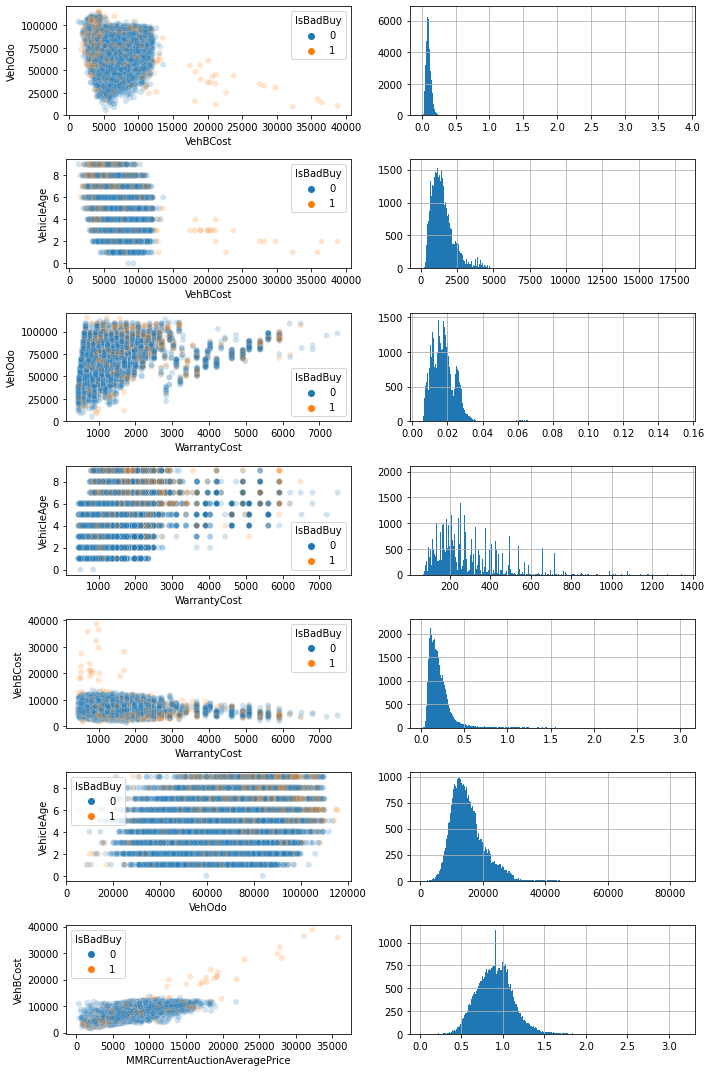

In [118]:
fig, ax = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 15))
sns.scatterplot(data = test_new_features, x = "VehBCost", y = "VehOdo", hue = "IsBadBuy", ax = ax[0][0], alpha = 0.2)
test_new_features["PricePerKM"].hist(ax = ax[0][1], bins = 500)
sns.scatterplot(data = test_new_features, x = "VehBCost", y = "VehicleAge", hue = "IsBadBuy", ax = ax[1][0], alpha = 0.2)
test_new_features["PricePerYear"].hist(ax = ax[1][1], bins = 500)
sns.scatterplot(data = test_new_features, x = "WarrantyCost", y = "VehOdo", hue = "IsBadBuy", ax = ax[2][0], alpha = 0.2)
test_new_features["WarrantyPerKM"].hist(ax = ax[2][1], bins = 500)
sns.scatterplot(data = test_new_features, x = "WarrantyCost", y = "VehicleAge", hue = "IsBadBuy", ax = ax[3][0], alpha = 0.2)
test_new_features["WarrantyPerYear"].hist(ax = ax[3][1], bins = 500)
sns.scatterplot(data = test_new_features, x = "WarrantyCost", y = "VehBCost", hue = "IsBadBuy", ax = ax[4][0], alpha = 0.2)
test_new_features["WarrantyPerPrice"].hist(ax = ax[4][1], bins = 500)
sns.scatterplot(data = test_new_features, x = "VehOdo", y = "VehicleAge", hue = "IsBadBuy", ax = ax[5][0], alpha = 0.2)
test_new_features["KMperYear"].hist(ax = ax[5][1], bins = 500)
sns.scatterplot(data = test_new_features, x = "MMRCurrentAuctionAveragePrice", y = "VehBCost", hue = "IsBadBuy", ax = ax[6][0], alpha = 0.2)
test_new_features["MMRvsPrice"].hist(ax = ax[6][1], bins = 500)
plt.tight_layout()

In [16]:
# Function creating new features. Will be part of the final data processing pipeline.

def engineer_features(df):
    """
    Creates new features.
    
    Parameters:
    -----------
    df : pd.DataFrame

    Returns:
    --------
    df : pd.DataFrame
    """
    df["PricePerKM"] = (df["VehBCost"]+1) / (df["VehOdo"]+1)
    df["PricePerYear"] = (df["VehBCost"]+1) / (df["VehicleAge"]+1)
    df["WarrantyPerKM"] = (df["WarrantyCost"]+1) / (df["VehOdo"]+1)
    df["WarrantyPerYear"] = (df["WarrantyCost"]+1) / (df["VehicleAge"]+1)
    df["WarrantyPerPrice"] = (df["WarrantyCost"]+1) / (df["VehBCost"]+1)
    df["KMperYear"] = (df["VehOdo"]+1) / (df["VehicleAge"]+1)
    df["MMRvsPrice"] = (df["MMRCurrentAuctionAveragePrice"]+1) / (df["VehBCost"]+1)
    return df

### Data Scaling and Dimensionality Reduction (for purposes of DTC and Random Forest)

MMR features are strongly correlated, therefore i will reduce them into single feature using PCA.

In [20]:
# scale all the MMR columns --- just for purposes of DTC and random forest

def tree_scale(df):
    """
    Scales the MMR columns using StandardScaler. Pre-step for "tree_pca()" function.
    To be used only in decision tree or random forest pipeline.
    """
    columns_to_scale = ['MMRAcquisitionAuctionAveragePrice', 
                    'MMRAcquisitionAuctionCleanPrice', 
                    'MMRAcquisitionRetailAveragePrice', 
                    'MMRAcquisitonRetailCleanPrice', 
                    'MMRCurrentAuctionAveragePrice', 
                    'MMRCurrentAuctionCleanPrice', 
                    'MMRCurrentRetailAveragePrice', 
                    'MMRCurrentRetailCleanPrice']

    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(df[columns_to_scale])
    df[columns_to_scale] = scaled_values
    
    return df

In [21]:
def tree_pca(df):
    """
    Uses PCA on scaled MMR columns.
    To be used only in decision tree or random forest pipeline.
    """
    columns_for_pca = ['MMRAcquisitionAuctionAveragePrice', 
                 'MMRAcquisitionAuctionCleanPrice', 
                 'MMRAcquisitionRetailAveragePrice', 
                 'MMRAcquisitonRetailCleanPrice', 
                 'MMRCurrentAuctionAveragePrice', 
                 'MMRCurrentAuctionCleanPrice', 
                 'MMRCurrentRetailAveragePrice', 
                 'MMRCurrentRetailCleanPrice']
    pca = PCA(n_components=1)
    pca_values = pca.fit_transform(df[columns_for_pca])
    pca_column_names = ['MMR_PCA1']
    df[pca_column_names] = pd.DataFrame(pca_values, index=df.index)

    df = df.drop(columns_for_pca, axis = 1)
    return df

In [126]:
# It is OK to reduce all the MMR columns into a single PCA column, as 93% of the variance is explained by the single component
# pca.explained_variance_ratio_.sum()   --- 0.9299305391954134

### Features Selection

IsBadBuy: 2
PurchDate: 517
Auction: 3
VehYear: 10
VehicleAge: 10
Make: 29
Model: 988
Trim: 90
SubModel: 817
Color: 16
Transmission: 3
WheelTypeID: 4
WheelType: 4
VehOdo: 37791
Nationality: 4
Size: 13
TopThreeAmericanName: 4
PRIMEUNIT: 3
AUCGUART: 3
BYRNO: 71
VNZIP1: 148
VNST: 34
VehBCost: 2036
IsOnlineSale: 2
WarrantyCost: 278
PricePerKM: 65511
PricePerYear: 10227
WarrantyPerKM: 62532
WarrantyPerYear: 1111
WarrantyPerPrice: 38116
KMperYear: 55347
MMRvsPrice: 61411
MMR_PCA1: 56517


<AxesSubplot:>

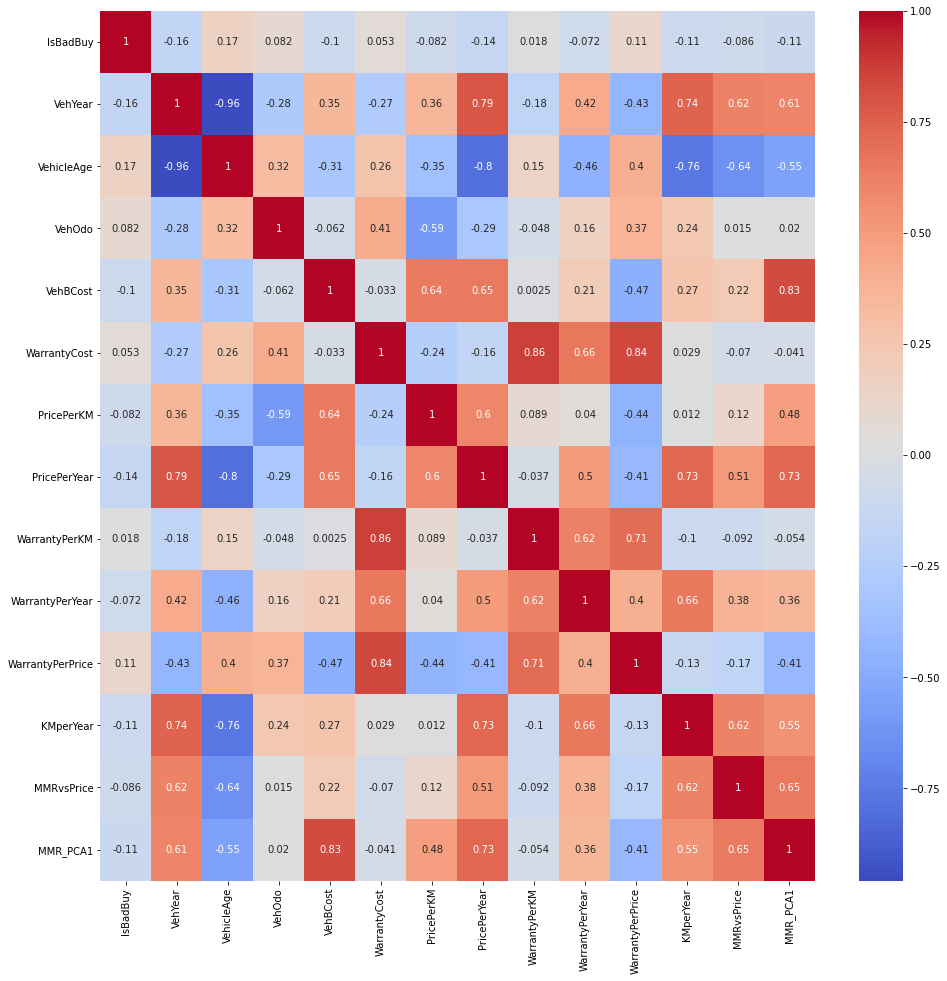

In [128]:
# final feature selection

for cat in df.columns:
    print(f"{cat}: {len(df[cat].unique())}")
    
# will not be used:
# PurchDate - useless to know when we bought the car, good only for imputation
# VehYear - basically contains same info as vehicle age
# Model, Trim, Submodel - too many categories (almost 2000), it was said that "Make" (car brand) has bigger influence
# WheelTypeID - same info as WheelType
# Nationality - similar info as TopThreeAmericanName, but TTANs categories have bigger difference between 0/1 distribution
# PRIMEUNIT - mostly full of NaNs
# BYRNO - has no influence on target
# VNZIP1 - 148 unique values... similar info as VNST
# WarrantyCost - correlation with other Warranty columns

fig, ax = plt.subplots(figsize = (16, 16))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm', ax = ax)

## Modeling

### Train different models

### DECISION TREE

First I build a simple baseline model to see, what is the "f1" score without any optimisation.

In [23]:
# build unoptimized model

# SIMPLE DECISION TREE

df = pd.read_csv("data_train.csv")
df = clean_data(df)
df = engineer_features(df)
df = tree_scale(df)
df = tree_pca(df)

feature_list = ["VehOdo", 
                "VehBCost", 
                "PricePerYear", 
                "WarrantyPerPrice", 
                "Transmission", 
                "Auction", 
                "Make", 
                "WheelType", 
                "Size", 
                "AUCGUART"]

# define target and features
target = df.loc[:,'IsBadBuy']
features = df.drop('IsBadBuy', axis=1)
features_train, features_test, target_train, target_test = train_test_split(features.loc[:, feature_list], 
                                                                            target, 
                                                                            random_state=42,
                                                                            test_size=0.1)

# define num_cols and cat_cols
cat_cols = list(features_train.select_dtypes(include=["category"]).columns)
num_cols = list(features_train.select_dtypes(include=["number"]).columns)

# instantiate model
ohe = OneHotEncoder(sparse=False, drop='if_binary')

preprocessor = ColumnTransformer([('cat', ohe, cat_cols), 
                                  ('num', 'passthrough', num_cols)], 
                                 remainder='drop')

tree_baseline = DecisionTreeClassifier(random_state = 42, 
                                       class_weight = "balanced")

# build pipeline
model_baseline = Pipeline([
    ('preprocessor', preprocessor),
    ('tree_baseline', tree_baseline)])

# fit pipeline on cleaned (and filtered) training set
model_baseline.fit(features_train, target_train)

# predict and evaluate on test set
target_train_pred = model_baseline.predict(features_train)
target_test_pred = model_baseline.predict(features_test)

print("UNOPTIMIZED TREE MODEL")
print(" ")
print("TRAIN")
#print(f"Accuracy_score: {accuracy_score(target_train, target_train_pred)}")
#print(f"Precision_score: {precision_score(target_train, target_train_pred)}")
#print(f"Recall_score: {recall_score(target_train, target_train_pred)}")
print(f"F1_score: {f1_score(target_train, target_train_pred)}")
print(" ")
print("TEST")
#print(f"Accuracy_score: {accuracy_score(target_test, target_test_pred)}")
#print(f"Precision_score: {precision_score(target_test, target_test_pred)}")
#print(f"Recall_score: {recall_score(target_test, target_test_pred)}")
print(f"F1_score: {f1_score(target_test, target_test_pred)}")

UNOPTIMIZED TREE MODEL
 
TRAIN
F1_score: 1.0
 
TEST
F1_score: 0.3024691358024691


Hyperparameter optimisation

In [147]:
# DECISION TREE - GRID SEARCH

ohe = OneHotEncoder(sparse=False, drop='if_binary')

preprocessor_tree = ColumnTransformer([('cat', ohe, cat_cols), 
                                       ('num', 'passthrough', num_cols)], 
                                         remainder='drop')

model_tree = DecisionTreeClassifier(random_state = 42, 
                                       class_weight = "balanced")

features_train_pre = preprocessor_tree.fit_transform(features_train)
features_test_pre = preprocessor_tree.transform(features_test)

search_space_tree = {
    "max_depth" : range(3, 8, 1),
    "min_samples_leaf" : range(3, 25, 1),
}

grid_search_tree = GridSearchCV(estimator = model_tree,
                                param_grid = search_space_tree,
                                cv = 5,
                                scoring = "f1",
                                n_jobs = -1,
                                verbose = 1)

grid_search_tree.fit(features_train_pre, target_train)

print(grid_search_tree.best_estimator_)
print(grid_search_tree.best_score_)

# predict and evaluate on test set
target_train_pred = grid_search_tree.predict(features_train_pre)
target_test_pred = grid_search_tree.predict(features_test_pre)

print("TREE MODEL AFTER GRID SEARCH")
print(" ")
print("TRAIN")
# print(f"Accuracy_score: {accuracy_score(target_train, target_train_pred)}")
# print(f"Precision_score: {precision_score(target_train, target_train_pred)}")
# print(f"Recall_score: {recall_score(target_train, target_train_pred)}")
print(f"F1_score: {f1_score(target_train, target_train_pred)}")
print(" ")
print("TEST")
# print(f"Accuracy_score: {accuracy_score(target_test, target_test_pred)}")
# print(f"Precision_score: {precision_score(target_test, target_test_pred)}")
# print(f"Recall_score: {recall_score(target_test, target_test_pred)}")
print(f"F1_score: {f1_score(target_test, target_test_pred)}")

Fitting 5 folds for each of 110 candidates, totalling 550 fits
DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=4,
                       random_state=42)
0.3681991895922447
TREE MODEL AFTER GRID SEARCH
 
TRAIN
F1_score: 0.39062334638586094
 
TEST
F1_score: 0.38606143970655665


### RANDOM FOREST

In [24]:
# RANDOM FOREST - GRID SEARCH

ohe = OneHotEncoder(sparse=False, drop='if_binary')

preprocessor = ColumnTransformer([('cat', ohe, cat_cols), 
                                  ('num', 'passthrough', num_cols)], 
                                 remainder='drop')

model_rf = RandomForestClassifier(class_weight = "balanced", 
                                  n_estimators = 100, 
                                  random_state = 42)

features_train_pre = preprocessor.fit_transform(features_train)
features_test_pre = preprocessor.transform(features_test)

search_space_rf = {
    "max_depth" : range(3, 8, 1),
    "min_samples_leaf" : range(4, 20, 2),
}

grid_search_rf = GridSearchCV(estimator = model_rf,
                                param_grid = search_space_rf,
                                cv = 5,
                                scoring = "f1",
                                n_jobs = -1,
                                verbose = 1)

grid_search_rf.fit(features_train_pre, target_train)

print(grid_search_rf.best_estimator_)
print(grid_search_rf.best_score_)

# predict and evaluate on test set
target_train_pred = grid_search_rf.predict(features_train_pre)
target_test_pred = grid_search_rf.predict(features_test_pre)

print(" ")
print("RANDOM FOREST MODEL - GRID SEARCH")
print(" ")
print("TRAIN")
# print(f"Accuracy_score: {accuracy_score(target_train, target_train_pred)}")
# print(f"Precision_score: {precision_score(target_train, target_train_pred)}")
# print(f"Recall_score: {recall_score(target_train, target_train_pred)}")
print(f"F1_score: {f1_score(target_train, target_train_pred)}")
print(" ")
print("TEST")
# print(f"Accuracy_score: {accuracy_score(target_test, target_test_pred)}")
# print(f"Precision_score: {precision_score(target_test, target_test_pred)}")
# print(f"Recall_score: {recall_score(target_test, target_test_pred)}")
print(f"F1_score: {f1_score(target_test, target_test_pred)}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
RandomForestClassifier(class_weight='balanced', max_depth=7,
                       min_samples_leaf=10, random_state=42)
0.37571985278144504
 
RANDOM FOREST MODEL - GRID SEARCH
 
TRAIN
F1_score: 0.3821535975582387
 
TEST
F1_score: 0.3890649762282092


### LOGISTIC REGRESSION

In [195]:
# Logistic regression preparation

df = pd.read_csv("data_train.csv")
df = clean_data(df)
df = engineer_features(df)

feature_list = ["VehOdo", 
                "VehBCost", 
                "PricePerYear", 
                "WarrantyPerPrice", 
                "Transmission", 
                "Auction", 
                "Make", 
                "WheelType", 
                "Size", 
                "AUCGUART"]

# define target and features
target = df.loc[:,'IsBadBuy']
features = df.drop('IsBadBuy', axis=1)
features_train, features_test, target_train, target_test = train_test_split(features.loc[:, feature_list], 
                                                                            target, 
                                                                            random_state=42,
                                                                            test_size=0.1)

cat_cols = list(features_train.select_dtypes(include=["category"]).columns)
num_cols = list(features_train.select_dtypes(include=["number"]).columns)

In [201]:
# LOG REG GRID SEARCH

preprocessor = ColumnTransformer(transformers=[('categorical', OneHotEncoder(), cat_cols),
                                               ('numerical', StandardScaler(), num_cols)], n_jobs = -1)

log_reg = LogisticRegression(class_weight = "balanced", 
                             random_state = 42, 
                             solver = "saga", 
                             max_iter = 1e4, 
                             n_jobs = -1)

pipeline_log = Pipeline(steps=[('preprocessor', preprocessor),
                               ('log_reg', log_reg)])

# search_space_log = {"log_reg__penalty" : ["l1", "l2"],
#                     "log_reg__C" : np.geomspace(7.84759970e-02, 3.35981829e-01, 20)}
# search_space_log = {"log_reg__penalty" : ["l1", "l2"],
#                     "log_reg__C" : np.geomspace(0.001, 1000, 20)}
search_space_log = {"log_reg__penalty" : ["l2"],
                    "log_reg__C" : np.geomspace(8e-02, 3.4e-01, 20)}

model_log_gridsearch = GridSearchCV(estimator = pipeline_log,
                                    param_grid = search_space_log,
                                    scoring = "f1",
                                    cv = 5,
                                    n_jobs = -1,
                                    verbose = 1)

model_log_gridsearch.fit(features_train, target_train)

print(model_log_gridsearch.best_params_)
print(model_log_gridsearch.best_score_)

# predict and evaluate on test set
target_train_pred = model_log_gridsearch.predict(features_train)
target_test_pred = model_log_gridsearch.predict(features_test)
print(" ")
print("LOGISTIC REGRESSION - GRIDSEARCH")
print(" ")
print("TRAIN")
# print(f"Accuracy_score: {accuracy_score(target_train, target_train_pred)}")
# print(f"Precision_score: {precision_score(target_train, target_train_pred)}")
# print(f"Recall_score: {recall_score(target_train, target_train_pred)}")
print(f"F1_score: {f1_score(target_train, target_train_pred)}")
print(" ")
print("TEST")
# print(f"Accuracy_score: {accuracy_score(target_test, target_test_pred)}")
# print(f"Precision_score: {precision_score(target_test, target_test_pred)}")
# print(f"Recall_score: {recall_score(target_test, target_test_pred)}")
print(f"F1_score: {f1_score(target_test, target_test_pred)}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'log_reg__C': 0.1848817760022701, 'log_reg__penalty': 'l2'}
0.36753048367708496
 
LOGISTIC REGRESSION - GRIDSEARCH
 
TRAIN
F1_score: 0.3696143227641596
 
TEST
F1_score: 0.3839351510685335


### KNN

In [202]:
# K-Nearest-Neighbors

df = pd.read_csv("data_train.csv")
df = clean_data(df)
df = engineer_features(df)

feature_list = ["VehOdo", 
                "VehBCost", 
                "PricePerYear", 
                "WarrantyPerPrice", 
                "Transmission", 
                "Auction", 
                "Make", 
                "WheelType", 
                "Size", 
                "AUCGUART"]

# define target and features
target = df.loc[:,'IsBadBuy']
features = df.drop('IsBadBuy', axis=1)
features_train, features_test, target_train, target_test = train_test_split(features.loc[:, feature_list], 
                                                                            target, 
                                                                            random_state=42,
                                                                            test_size=0.1)

cat_cols = list(features_train.select_dtypes(include=["category"]).columns)
num_cols = list(features_train.select_dtypes(include=["number"]).columns)

In [203]:
# UNDER/OVERSAMPLING, SMOTE

preprocessor = ColumnTransformer(transformers=[('categorical', OneHotEncoder(), cat_cols),
                                               ('numerical', StandardScaler(), num_cols)], n_jobs = -1)

features_train_pre = preprocessor.fit_transform(features_train)
features_test_pre = preprocessor.transform(features_test)

undersampler = RandomUnderSampler(random_state=42)
features_train_under, target_train_under = undersampler.fit_resample(features_train_pre, target_train)

oversampler = RandomOverSampler(random_state=42)
features_train_over, target_train_over = oversampler.fit_resample(features_train_pre, target_train)

smotesampler = SMOTE(random_state=42)
features_train_smote, target_train_smote = smotesampler.fit_resample(features_train_pre, target_train)

In [21]:
# GRID SEARCH TEST - UNDER

knn = KNeighborsClassifier()

pipeline_knn = Pipeline(steps=[('knn', knn)])

search_space_knn = {"knn__n_neighbors" : np.geomspace(1,500,30,dtype="int"),
                    "knn__weights" : ["uniform", "distance"]}

knn_under_grid = GridSearchCV(estimator = pipeline_knn,
                                    param_grid = search_space_knn,
                                    scoring = "f1",
                                    cv = 5,
                                    n_jobs = -1,
                                    verbose = 1)

knn_under_grid.fit(features_train_under, target_train_under)

print(knn_under_grid.best_params_)
print(knn_under_grid.best_score_)


# predict and evaluate on test set
target_train_pred = knn_under_grid.predict(features_train_under)
target_test_pred = knn_under_grid.predict(features_test_pre)

print("KNN - UNDERSAMPLE")
print(" ")
print("TRAIN")
# print(f"Accuracy_score: {accuracy_score(target_train_under, target_train_pred)}")
# print(f"Precision_score: {precision_score(target_train_under, target_train_pred)}")
# print(f"Recall_score: {recall_score(target_train_under, target_train_pred)}")
print(f"F1_score: {f1_score(target_train_under, target_train_pred)}")
print(" ")
print("TEST")
# print(f"Accuracy_score: {accuracy_score(target_test, target_test_pred)}")
# print(f"Precision_score: {precision_score(target_test, target_test_pred)}")
# print(f"Recall_score: {recall_score(target_test, target_test_pred)}")
print(f"F1_score: {f1_score(target_test, target_test_pred)}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'knn__n_neighbors': 111, 'knn__weights': 'distance'}
0.6575308548746872
KNN - UNDERSAMPLE
TRAIN
Accuracy_score: 1.0
Precision_score: 1.0
Recall_score: 1.0
F1_score: 1.0
TEST
Accuracy_score: 0.7229503200243829
Precision_score: 0.2615309126594701
Recall_score: 0.6300236406619385
F1_score: 0.369625520110957


In [216]:
#SMOTE

knn = KNeighborsClassifier(n_neighbors = 600, n_jobs = -1, weights = "distance")
# 600 - 0.348
pipeline_knn = Pipeline(steps=[('knn', knn)])

pipeline_knn.fit(features_train_smote, target_train_smote)

# predict and evaluate on test set
target_train_pred = pipeline_knn.predict(features_train_smote)
target_test_pred = pipeline_knn.predict(features_test_pre)

print("KNN - SMOTE")
print(" ")
print("TRAIN")
# print(f"Accuracy_score: {accuracy_score(target_train_smote, target_train_pred)}")
# print(f"Precision_score: {precision_score(target_train_smote, target_train_pred)}")
# print(f"Recall_score: {recall_score(target_train_smote, target_train_pred)}")
print(f"F1_score: {f1_score(target_train_smote, target_train_pred)}")
print(" ")
print("TEST")
# print(f"Accuracy_score: {accuracy_score(target_test, target_test_pred)}")
# print(f"Precision_score: {precision_score(target_test, target_test_pred)}")
# print(f"Recall_score: {recall_score(target_test, target_test_pred)}")
print(f"F1_score: {f1_score(target_test, target_test_pred)}")

KNN - SMOTE
 
TRAIN
F1_score: 1.0
 
TEST
F1_score: 0.3486682808716706


In [215]:
#OVER

knn = KNeighborsClassifier(n_neighbors = 500, n_jobs = -1, weights = "distance")
# 500 - 0.363
pipeline_knn = Pipeline(steps=[('knn', knn)])

pipeline_knn.fit(features_train_over, target_train_over)

# predict and evaluate on test set
target_train_pred = pipeline_knn.predict(features_train_over)
target_test_pred = pipeline_knn.predict(features_test_pre)

print("KNN - OVERSAMPLE")
print(" ")
print("TRAIN")
# print(f"Accuracy_score: {accuracy_score(target_train_over, target_train_pred)}")
# print(f"Precision_score: {precision_score(target_train_over, target_train_pred)}")
# print(f"Recall_score: {recall_score(target_train_over, target_train_pred)}")
print(f"F1_score: {f1_score(target_train_over, target_train_pred)}")
print(" ")
print("TEST")
# print(f"Accuracy_score: {accuracy_score(target_test, target_test_pred)}")
# print(f"Precision_score: {precision_score(target_test, target_test_pred)}")
# print(f"Recall_score: {recall_score(target_test, target_test_pred)}")
print(f"F1_score: {f1_score(target_test, target_test_pred)}")

KNN - OVERSAMPLE
 
TRAIN
F1_score: 1.0
 
TEST
F1_score: 0.36394673950153633


In [210]:
#UNDER

knn = KNeighborsClassifier(n_neighbors = 111, n_jobs = -1, weights = "distance")

pipeline_knn = Pipeline(steps=[('knn', knn)])

pipeline_knn.fit(features_train_under, target_train_under)

# predict and evaluate on test set
target_train_pred = pipeline_knn.predict(features_train_under)
target_test_pred = pipeline_knn.predict(features_test_pre)

print("KNN - UNDERSAMPLE")
print(" ")
print("TRAIN")
# print(f"Accuracy_score: {accuracy_score(target_train_under, target_train_pred)}")
# print(f"Precision_score: {precision_score(target_train_under, target_train_pred)}")
# print(f"Recall_score: {recall_score(target_train_under, target_train_pred)}")
print(f"F1_score: {f1_score(target_train_under, target_train_pred)}")
print(" ")
print("TEST")
# print(f"Accuracy_score: {accuracy_score(target_test, target_test_pred)}")
# print(f"Precision_score: {precision_score(target_test, target_test_pred)}")
# print(f"Recall_score: {recall_score(target_test, target_test_pred)}")
print(f"F1_score: {f1_score(target_test, target_test_pred)}")

KNN - UNDERSAMPLE
 
TRAIN
F1_score: 1.0
 
TEST
F1_score: 0.369625520110957


### Model selection

The models had following F1 scores:

1 - Random Forest: 0.3890649762282092

2 - Decision Tree: 0.38606143970655665

3 - Logistic Regression: 0.3839351510685335

4 - KNN-Undersample: 0.369625520110957

5 - KNN-SMOTE: 0.3486682808716706

6 - KNN-Oversample: 0.36394673950153633

Random forest had the best performance therefore this model will be used for the classification of the "aim data".

KNN had rather underwhelming performance, but this is caused mainly by high computing requirements of this model, and therefore it was impossible to perform proper grid search with the limited computing time and memory.

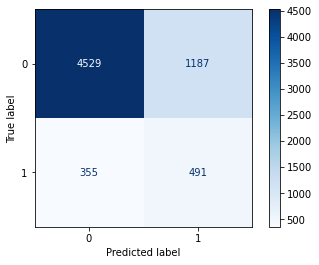

In [259]:
# select model
plot_confusion_matrix(grid_search_rf, features_test_pre, target_test, cmap = "Blues", values_format = "d")

## The final Pipeline

I have created functions for data preparation, cleaning, feature engineering etc. Now is the time to create final function with the best performing model - Random Forest.

In [30]:
# RANDOM FOREST - TRAIN FINAL MODEL WITH OPTIMAL PARAMETERS

# load and process data
df = pd.read_csv("data_train.csv")
df = clean_data(df)
df = engineer_features(df)

feature_list = ["VehOdo", 
                "VehBCost", 
                "PricePerYear", 
                "WarrantyPerPrice", 
                "Transmission", 
                "Auction", 
                "Make", 
                "WheelType", 
                "Size", 
                "AUCGUART"]

# define target and features
target = df.loc[:,'IsBadBuy']
features = df.drop('IsBadBuy', axis=1)
features_train, features_test, target_train, target_test = train_test_split(features.loc[:, feature_list], 
                                                                            target, 
                                                                            random_state=42,
                                                                            test_size=0.1)

# define num_cols and cat_cols
cat_cols = list(features_train.select_dtypes(include=["category"]).columns)
num_cols = list(features_train.select_dtypes(include=["number"]).columns)

# RF Pipeline
ohe = OneHotEncoder(sparse=False, drop='if_binary')

preprocessor = ColumnTransformer([('cat', ohe, cat_cols), 
                                  ('num', 'passthrough', num_cols)], 
                                 remainder='drop')

rf = RandomForestClassifier(max_depth = 7, 
                            min_samples_leaf = 10, 
                            class_weight = "balanced", 
                            n_estimators = 100, 
                            random_state = 42)

pipeline_rf = Pipeline([('preprocessor', preprocessor),
                        ('classifier', rf)])

# train model
pipeline_rf.fit(features_train, target_train)

# save model
pickle.dump(pipeline_rf, open('random_forest.p', 'wb'))

In [8]:
def predict_badbuys_rf(csv_file):
    """
    Predict, whether a car is potential "BadBuy" or not.
    
    Args:
        csv_file (str): Path of the dataset, for which the prediction should be made.
    
    Returns:
        numpyArray: Array with prediction.
    """
    # load model
    model_load_rf = pickle.load(open('random_forest.p', 'rb'))

    # load and process data
    features_aim = pd.read_csv(csv_file)
    features_aim = clean_data(features_aim)
    features_aim = engineer_features(features_aim)

    feature_list = ["VehOdo", 
                    "VehBCost", 
                    "PricePerYear", 
                    "WarrantyPerPrice", 
                    "Transmission", 
                    "Auction", 
                    "Make", 
                    "WheelType", 
                    "Size", 
                    "AUCGUART"]

    # define aim features
    features_aim = features_aim.loc[:, feature_list]
    # predict aim target
    target_aim_pred = model_load_rf.predict(features_aim)

    return target_aim_pred

## Model Interpretation

To make your model appealing to the company's buyers, we need to explain to them what features are important for the model.

In [25]:
pd.set_option("display.float_format", "{:.5f}".format)

best_rf = grid_search_rf.best_estimator_
importances = best_rf.feature_importances_
feature_names = preprocessor.transformers_[0][1].get_feature_names().tolist() + num_cols
feature_importances = pd.Series(index = feature_names, 
                                data = importances)

feature_importances.sort_values(ascending = False)[:10]

# For the RANDOM FOREST
# the most important feature is "WheelType", followed by custom feature "PricePerYear" and "VehBCost"

x3_UNKNOWN         0.36023
PricePerYear       0.15228
x3_Covers          0.09991
VehBCost           0.08809
WarrantyPerPrice   0.06867
x3_Alloy           0.05452
VehOdo             0.03801
x5_GREEN           0.02463
x5_YELLOW          0.01857
x1_MANHEIM         0.01238
dtype: float64

In [256]:
df.groupby("IsBadBuy")["WheelType"].count()

pd.crosstab(df["IsBadBuy"], df["WheelType"], normalize = "columns")

WheelType,Alloy,Covers,Special,UNKNOWN
IsBadBuy,,,,
0,0.88892,0.91916,0.87444,0.29684
1,0.11108,0.08084,0.12556,0.70316


How does the average prediction change with varying "VehOdo", "VehBCost" and "PricePerYear"?

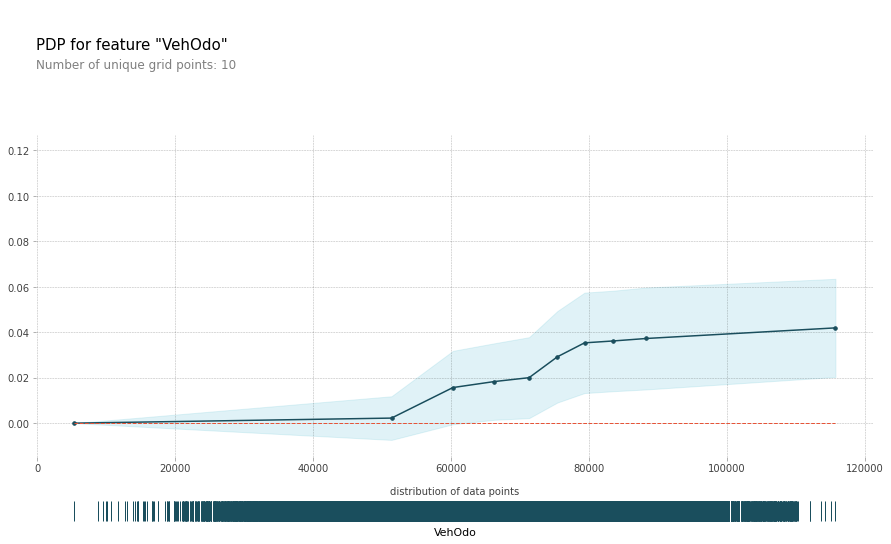

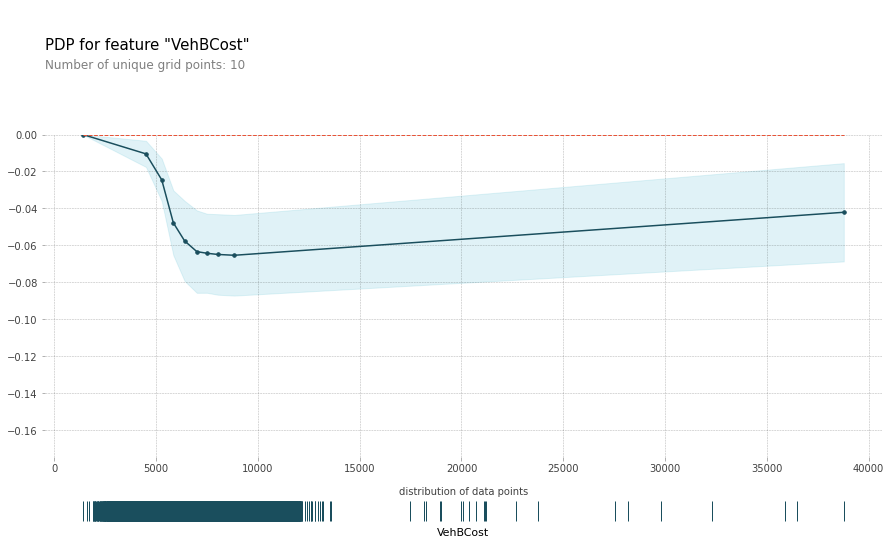

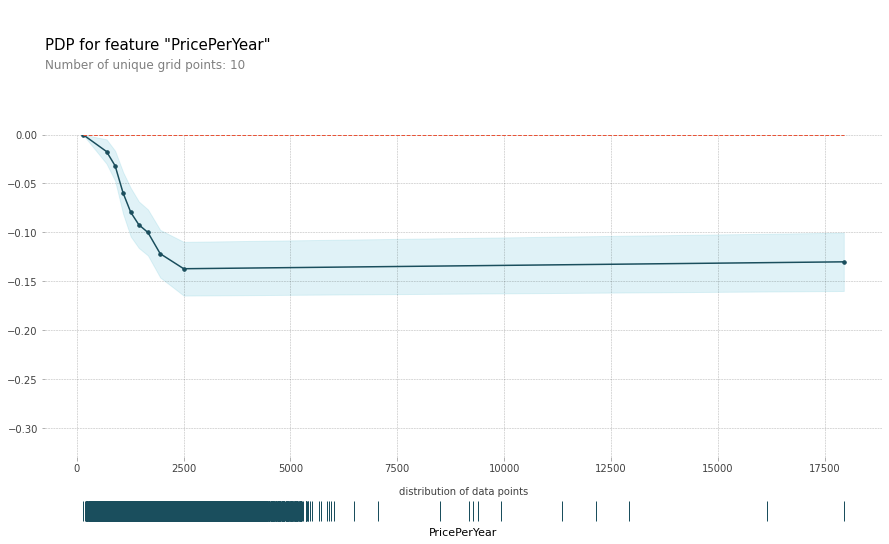

In [59]:
# PDP plot for chosen Features

pdp_features = ["VehOdo", "VehBCost", "PricePerYear"]
pdp_isolate_list = []

for feat in pdp_features:
    pdp_is = pdp.pdp_isolate(model = pipeline_rf, 
                             dataset = df, 
                             model_features = feature_list, 
                             feature = feat)
    pdp_isolate_list.append(pdp_is)
    
for i in range(len(pdp_features)):
    pdp.pdp_plot(pdp_isolate_list[i], feature_name=pdp_features[i], center=True, plot_pts_dist=True)
    
# Higher ODO increases risk of BadBuy
# Up to 10000 USD, with increasing price of cars the risk of BadBuy sinks. Above 10000 the risk of BadBuy slightly grows.
# The higher the PricePerYear, the lower the risk of BadBuy. This works until 2500 USD, above this level there is no change.

## Completion of the project

Prediction for the *features_aim.csv* data. Predicted outcome is saved into "target_aim_pred" variable and then into "predictions_aim.csv" file. At this point the SF examiners compared the results and my model passed the exam.

In [305]:
# make prediction
target_aim_pred = predict_badbuys_rf("features_aim.csv")

# save prediction
pd.DataFrame(target_aim_pred).to_csv('predictions_aim.csv')

print(f"{target_aim_pred.sum()} cars are marked as possible BadBuy. That is {round((target_aim_pred.sum() * 100 / len(target_aim_pred)), 2)} % of the cars in the dataset.")

1871 cars are marked as possible BadBuy. That is 25.66 % of the cars in the dataset.


The project is completed!